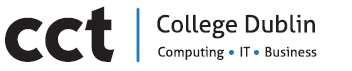


|                ||                       | 
|----------------||-----------------------|
|Module Title(s):||Problem Solving for Industry| 
|Assement Title:||Capstone Pair Project| 
|Lecture (s) Name:||Dr. Muhammad Iqbal|
|Student Name:||Eliabe Baliero de Moura|
|Student Number:||2022474|
|Issue Date:||26th Feb 2024|
|Assessment Due Date:||17th May 2024 (23:59 Irish Time)|
|Date of Submission:||17th May 2024|



Link for dataset: https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction

# Table of Contents

- [Introduction](#Introduction) 2
- [Data Analysis](#Data-Analysis) 3

     - [](#) 
     - [Cleaning Dataset](#Cleaning-Dataset) 4
     - [Dropping Columns](#Dropping-Columns) 4.0.1
     - [Checking Duplicated Rows](#Checking-Duplicated-Rows) 4.0.2
     - [Dropping duplicated Rows](#Dropping-duplicated-Rows) 4.0.3
     - [Convert to Lower Case](#Convert-to-Lower-Case) 4.0.4
     - [Remove Spaces](#Remove-Spaces) 4.0.5
     - [Checking Null](#Checking-Null) 4.0.6
     - [Indentify-Outliers](#Indentify-Outliers) 4.0.7
     - [Histogram](#Histogram) 4.0.8
     - [Define Columns Outliers](#Define-Columns-Outliers) 4.0.9
     - [Eliminating Outliers](#Eliminating-Outliers) 4.0.10
     - [](#) 
- [Machine Learning](#Machine-Learning) 5
- [Labeled and Unlabeled Data](#Labeled-and-Unlabeled-Data) 6  
     - [](#) 
     - [Evaluate Some Algorithms](#Evaluate-Some-Algorithms) 7
     - [Convert Categorical](#Convert-Categorical) 7.0.1
     - [Create a Validation Dataset](#Create-a-Validation-Dataset) 7.0.2
     - [Test Harness](#Test-Harness) 7.0.3
     - [Build Models](#Build-Models) 7.0.4
     - [Select Best Model](#Select-Best-Model) 7.0.5
     - [Make Predictions](#Make-Predictions) 7.0.6
     - [Evaluate Predictions](#Evaluate-Predictions) 7.0.7
     - [](#) 
- [References](#References) 8


# Introduction 

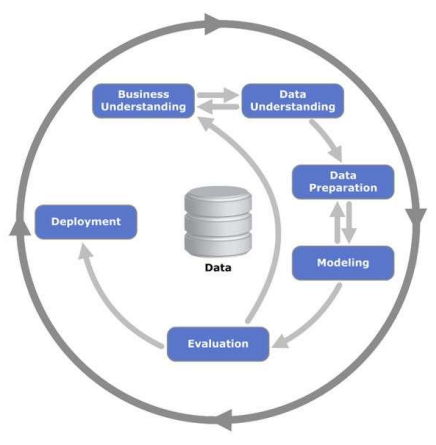

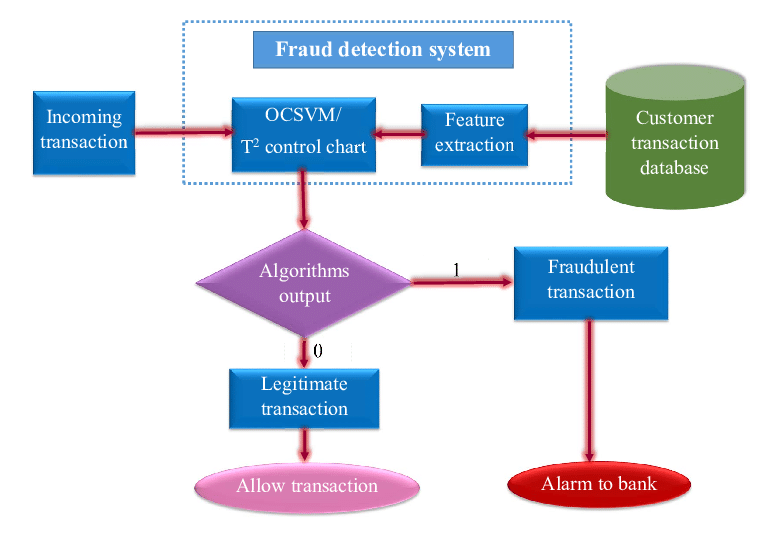

# Data Analysis

In [75]:

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Load the dataset csv Fraud file

Link for dataset https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction

In [76]:
df = pd.read_csv("fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [77]:
df.shape # First "How many observations(rows) and how many features (columns)"

(107157, 11)

Check data type of each feature

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107157 entries, 0 to 107156
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            107157 non-null  int64  
 1   type            107157 non-null  object 
 2   amount          107157 non-null  float64
 3   nameOrig        107157 non-null  object 
 4   oldbalanceOrg   107157 non-null  float64
 5   newbalanceOrig  107157 non-null  float64
 6   nameDest        107157 non-null  object 
 7   oldbalanceDest  107157 non-null  float64
 8   newbalanceDest  107157 non-null  float64
 9   isFraud         107157 non-null  int64  
 10  isFlaggedFraud  107157 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.0+ MB


In [79]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,107157.000000,1.071570e+05,1.071570e+05,1.071570e+05,1.071570e+05,1.071570e+05,107157.000000,107157.0
mean,8.599849,1.754928e+05,9.034769e+05,9.194839e+05,8.856197e+05,1.186811e+06,0.001120,0.0
std,1.802869,3.474249e+05,2.809721e+06,2.847273e+06,2.396763e+06,2.787078e+06,0.033446,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.015753e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.471936e+04,2.021200e+04,0.000000e+00,2.231400e+04,5.800336e+04,0.000000,0.0
75%,10.000000,2.137453e+05,1.984916e+05,2.233438e+05,6.052411e+05,1.080369e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


# Cleaning Dataset 


### Dropping Columns 

The fields 'nameOrig' and 'nameDest' typically represent identifiers or account numbers in financial transaction datasets.
Account numbers and identifiers can change over time due to various reasons such as mergers, acquisitions, or simply administrative updates. Therefore, relying on these identifiers for fraud detection might not be reliable in the long term.

In [80]:
columns_to_drop = ['nameOrig', 'nameDest']  # Add the names of columns you want to drop
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


### Checking Duplicated Rows 

In [81]:
duplicates = df.duplicated()
print("\nDuplicate Rows:")
print(df[duplicates])
df.shape


Duplicate Rows:
        step     type    amount  oldbalanceOrg  newbalanceOrig  \
11104      7  PAYMENT   1849.50            0.0             0.0   
33556      8  PAYMENT   7759.31            0.0             0.0   
59969      9  PAYMENT   2388.93            0.0             0.0   
60763      9  PAYMENT  10042.85            0.0             0.0   
63096      9  PAYMENT   2783.83            0.0             0.0   
69138      9  PAYMENT   6755.57            0.0             0.0   
72575      9  PAYMENT   6499.28            0.0             0.0   
105715    10  PAYMENT   3237.54            0.0             0.0   

        oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
11104              0.0             0.0        0               0  
33556              0.0             0.0        0               0  
59969              0.0             0.0        0               0  
60763              0.0             0.0        0               0  
63096              0.0             0.0        0           

(107157, 9)

### Dropping duplicated Rows
Now we can drop the rows that are duplicated

In [82]:
df = df.drop_duplicates()
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
107152,10,TRANSFER,183929.72,40720.00,0.00,0.00,183929.72,0,0
107153,10,CASH_OUT,19615.20,55248.00,35632.80,141318.70,21731.68,0,0
107154,10,PAYMENT,651.71,81340.00,80688.29,0.00,0.00,0,0
107155,10,PAYMENT,1549.84,403875.97,402326.12,0.00,0.00,0,0


### Convert to Lower Case
Convert all string values to lower case

In [83]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

### Remove Spaces
Remove extra white spaces from all string columns

In [84]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

### Checking Null
Checking any null/na in my data

In [85]:
df.isnull().sum()
#df.fillna('')

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Indentify Outliers

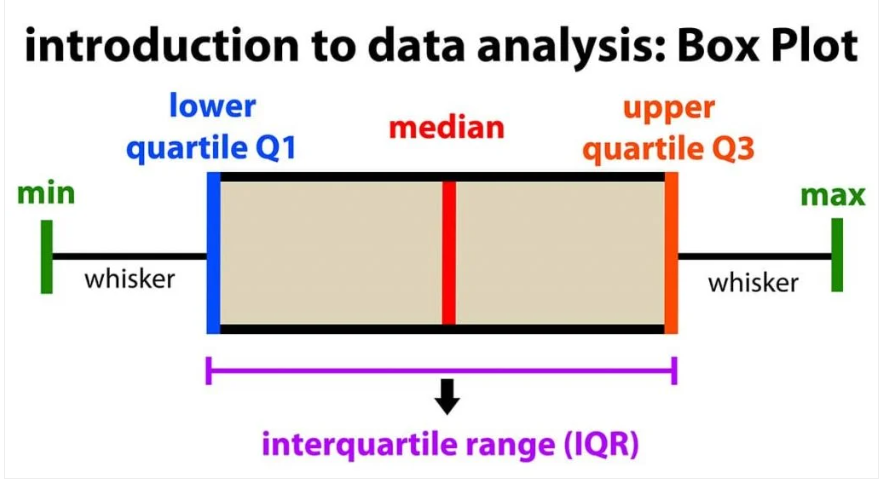

Check boxplot to see outliers 

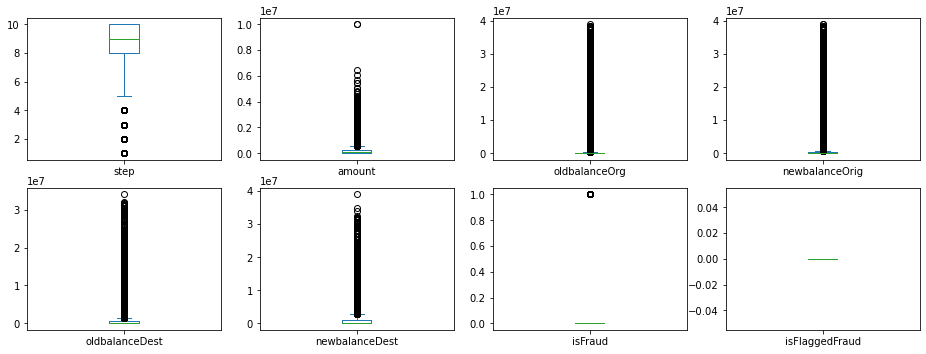

(107149, 9)

In [87]:
import matplotlib.pyplot as plt
df.groupby('type').size()
# Plot the box plot with directly specified figure size
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16, 12))

# Show the plot
plt.show()
df.shape

### Histogram
Histogram of each input variable to see distribution

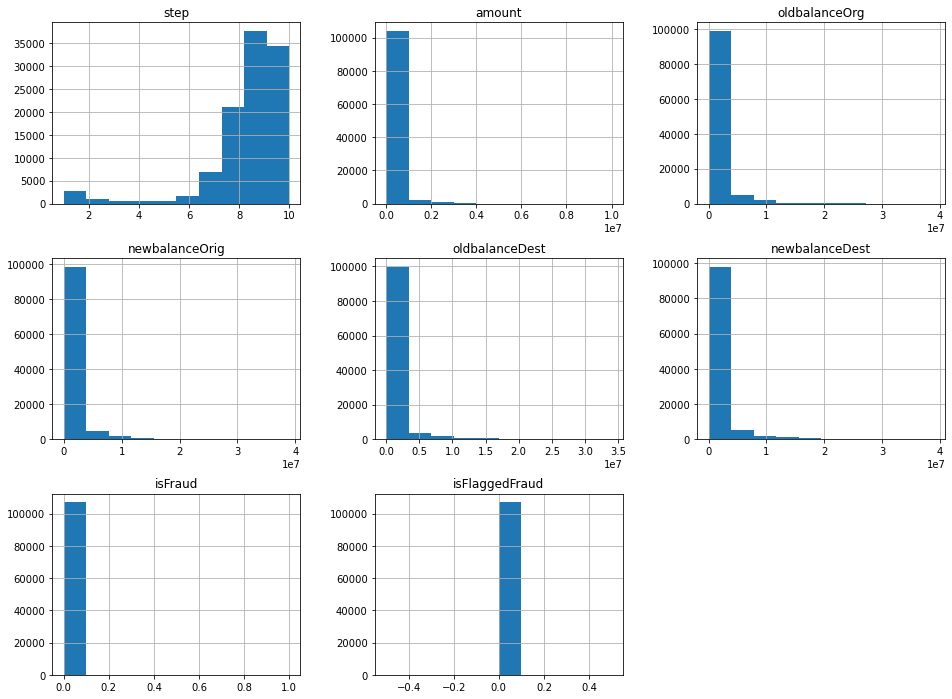

In [88]:
fig, ax = plt.subplots(figsize=(16, 12))  # Adjust the width and height as needed

# Plot the histogram
df.hist(ax=ax)

# Show the plot
plt.show()

### Define Columns Outliers 
Define columns outliers 
Define the columns you want to check for outliers

In [89]:
import pandas as pd
import numpy as np

# Define the function to calculate lower and upper bounds
def remove_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    lwr_bound = Q1 - 1.5 * IQR
    upr_bound = Q3 + 1.5 * IQR
    
    return lwr_bound, upr_bound

# List of columns to process
columns_to_process = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
df.shape

(107149, 9)

### Eliminating Outliers

(107149, 9)

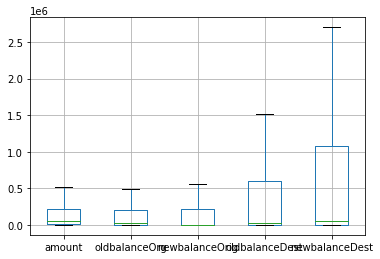

In [90]:
# List of columns to process
columns_to_process = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

# Apply the outlier removal and capping for each column
for column in columns_to_process:
    low, high = remove_outlier(df[column])
    df[column] = np.where(df[column] > high, high, df[column])
    df[column] = np.where(df[column] < low, low, df[column])

# Plot boxplot for each column
df.boxplot(column=columns_to_process)
df.shape


# Machine Learning 

# Labeled and Unlabeled Data

# Evaluate Some Algorithms 


Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build multiple different models to predict species from flower measurements
4. Select the best model. 

### Convert Categorical 
Before lets convert categorical features like "type" to numerical 

In [91]:
# Convert categorical "type" to numerical values variables
df = pd.get_dummies(df, columns=['type'])
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107152,10,183929.72,40720.00,0.00,0.00,183929.72,0,0,False,False,False,False,True
107153,10,19615.20,55248.00,35632.80,141318.70,21731.68,0,0,False,True,False,False,False
107154,10,651.71,81340.00,80688.29,0.00,0.00,0,0,False,False,False,True,False
107155,10,1549.84,403875.97,402326.12,0.00,0.00,0,0,False,False,False,True,False


Once we convert "type" to numerical it becomes boolean. Now let's convert the "type " from boolean to int

In [92]:
columns_to_convert = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Convert bool columns to float64
df[columns_to_convert] = df[columns_to_convert].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107149 entries, 0 to 107156
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            107149 non-null  int64  
 1   amount          107149 non-null  float64
 2   oldbalanceOrg   107149 non-null  float64
 3   newbalanceOrig  107149 non-null  float64
 4   oldbalanceDest  107149 non-null  float64
 5   newbalanceDest  107149 non-null  float64
 6   isFraud         107149 non-null  int64  
 7   isFlaggedFraud  107149 non-null  int64  
 8   type_CASH_IN    107149 non-null  int32  
 9   type_CASH_OUT   107149 non-null  int32  
 10  type_DEBIT      107149 non-null  int32  
 11  type_PAYMENT    107149 non-null  int32  
 12  type_TRANSFER   107149 non-null  int32  
dtypes: float64(5), int32(5), int64(3)
memory usage: 9.4 MB


Put "isFraud" column to be the last column, to make easir to me split it in x and y

In [93]:
# Assuming df is your DataFrame containing the data
# Drop the isFraud column and save it separately
is_fraud_column = df.pop('isFraud')

# Append the isFraud column to the DataFrame as the last column
df['isFraud'] = is_fraud_column
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,0,1,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,0,1,0,0,0,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107152,10,183929.72,40720.00,0.00,0.00,183929.72,0,0,0,0,0,1,0
107153,10,19615.20,55248.00,35632.80,141318.70,21731.68,0,0,1,0,0,0,0
107154,10,651.71,81340.00,80688.29,0.00,0.00,0,0,0,0,1,0,0
107155,10,1549.84,403875.97,402326.12,0.00,0.00,0,0,0,0,1,0,0


### Create a Validation Dataset

Now we will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [94]:
array = df.values
X = array[:,0:12]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


### Test Harness

Using stratified 10-fold cross-validation with a fixed random seed ensures consistent evaluation of algorithms on the same train-test splits, maintaining class distribution. Accuracy, as the evaluation metric, provides a clear measure of overall model performance. Employing the 'scoring' variable ensures uniform assessment using the chosen metric, aiding in model selection.

### Build Models
I chose those 2 models to explain  because those brought me better results.
These models offer a balance of interpretability, efficiency, and performance, 
making them valuable choices for prediction tasks. Evaluating their performance 
on your dataset will help identify the best model.

1. K-Nearest Neighbors (KNN).
2. Random Forest Classifier(RF)


In [95]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('KNN', KNeighborsClassifier()))

Evaluate each model

In [96]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.999288 (0.000122)
KNN: 0.998927 (0.000163)


### Select Best Model

Note, you’re results may vary given the stochastic nature of the learning algorithms. In this case, we can see that it looks like Support Vector Machines (RF) has the largest estimated accuracy score.
We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model

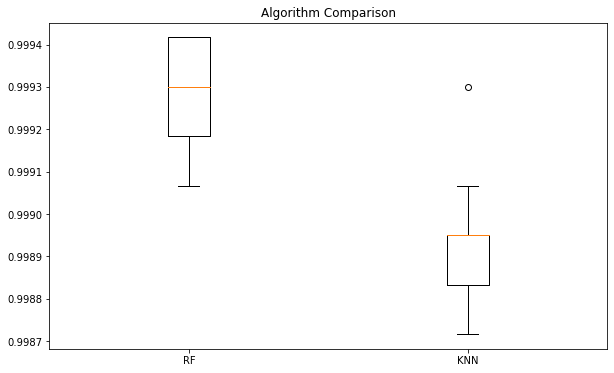

In [97]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
plt.boxplot(results, labels=names)

# Add title
plt.title('Algorithm Comparison')

# Show the plot
plt.show()

###  Make Predictions

We can fit the RF model on the entire training dataset and make predictions on the validation dataset.

In [98]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)


### Evaluate Predictions

Using Confusion Matrix to compare expected results and accuracy.

0.999020065328978


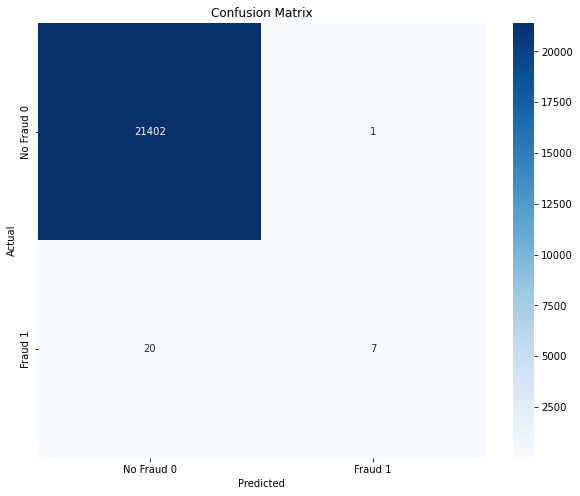

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


print(accuracy_score(Y_validation, predictions))

# Assuming Y_validation contains true labels and predictions contains predicted labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_validation, predictions)

# Define labels for the confusion matrix
labels = ['No Fraud 0', 'Fraud 1']  # Replace ... with your class labels

# Plot confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Those values in the matrix if we some we can see it's representing 20% of our data:

No Fraud 0 : The classifier correctly predicted 14184 instances as "no Fraud" and misclassified only 12 as another class.

Fraud 1: The classifier correctly predicted 166 instances as "Fraud", but it misclassified 18 instances as other classes.

In [100]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21403
         1.0       0.88      0.26      0.40        27

    accuracy                           1.00     21430
   macro avg       0.94      0.63      0.70     21430
weighted avg       1.00      1.00      1.00     21430



# References

Saul Mcleod (2023) Box Plot Explained [Online] Available at:     
https://www.simplypsychology.org/boxplots.html                                          
[Accessed 05 April 2024].

Frank Lee (2023) Using Supervised Machine Learning [Online] Available at:     
https://files.eric.ed.gov/fulltext/EJ1403991.pdf                                         
[Accessed 10 April 2024].

El Naqa and Murphy (2015) What is machine learning? [Online] Available at:     
https://www.researchgate.net/publication/324568763_Machine_Learning_in_Radiation_Oncology_Opportunities_Requirements_and_Needs   
[Accessed 20 April 2024].

